# Q no 1: Support Vector Machine
## b part

In [35]:
!pip3 install python-mnist numpy scikit-learn
!pip3 install idx2numpy
!pip3 install sciket-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sciket-learn (from versions: none)
ERROR: No matching distribution found for sciket-learn

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import idx2numpy
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [4]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


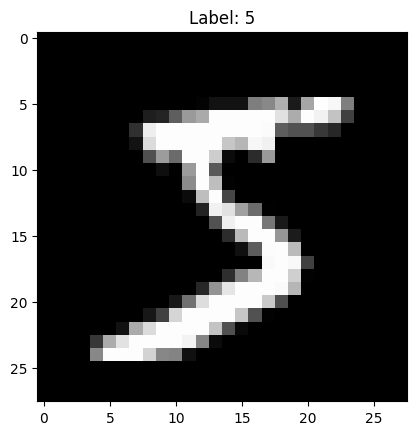

In [5]:
import matplotlib.pyplot as plt

#Show Grayscale Image 
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [6]:
# Reshape the data into 2D arrays (flatten 28x28 images to 784 features)
X_train = train_images.reshape(train_images.shape[0], -1).astype('float32')
X_test = test_images.reshape(test_images.shape[0], -1).astype('float32')
y_train = train_labels
y_test = test_labels

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train a Linear SVM (One-vs-All) with scale
linear_svm = SVC(kernel='linear', decision_function_shape='ovr')
linear_svm.fit(X_train_scaled, y_train)

# Training accuracy
train_accuracy = linear_svm.score(X_train_scaled, y_train)
print(f"Linear SVM Training Accuracy: {train_accuracy * 100:.2f}%")

Linear SVM Training Accuracy: 98.21%


In [7]:
# Train a Non-linear SVM (RBF Kernel)
rbf_svm = SVC(kernel='rbf', decision_function_shape='ovr')
rbf_svm.fit(X_train_scaled, y_train)

# RBF Kernel training accuracy
rbf_train_accuracy = rbf_svm.score(X_train_scaled, y_train)
print(f"RBF Kernel SVM Training Accuracy: {rbf_train_accuracy * 100:.2f}%")

RBF Kernel SVM Training Accuracy: 98.66%


In [ ]:
# Test accuracy
L_test_accuracy = linear_svm.score(X_test_scaled, y_test)
print(f"Linear SVM Test Accuracy: {L_test_accuracy * 100:.2f}%")
# RBF Kernel test accuracy
rbf_test_accuracy = rbf_svm.score(X_test_scaled, y_test)
print(f"RBF Kernel SVM Test Accuracy: {rbf_test_accuracy * 100:.2f}%")

Linear SVM Test Accuracy: 92.93%
RBF Kernel SVM Test Accuracy: 96.60%


# Q no 2
# a: ANN

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

# Preprocess data
X_train = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255
X_test = test_images.reshape(test_images.shape[0], -1).astype('float32') / 255
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)

# Define ANN architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"ANN Test Accuracy: {accuracy * 100:.2f}%")


c:\Users\Fatimah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8121 - loss: 0.6776 - val_accuracy: 0.9482 - val_loss: 0.1803
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1628 - val_accuracy: 0.9617 - val_loss: 0.1299
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9689 - loss: 0.1054 - val_accuracy: 0.9667 - val_loss: 0.1135
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0783 - val_accuracy: 0.9699 - val_loss: 0.0980
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0606 - val_accuracy: 0.9697 - val_loss: 0.1019
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0459 - val_accuracy: 0.9732 - val_loss: 0.0892
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0367 - val_accuracy: 0.9740 - val_loss: 0.0914
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.

## b: CNN

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Preprocess data for CNN
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)

# Define CNN architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")


Epoch 1/10


c:\Users\Fatimah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8028 - loss: 0.6374 - val_accuracy: 0.9774 - val_loss: 0.0772
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9702 - loss: 0.0965 - val_accuracy: 0.9837 - val_loss: 0.0558
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9785 - loss: 0.0671 - val_accuracy: 0.9872 - val_loss: 0.0451
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9850 - loss: 0.0470 - val_accuracy: 0.9897 - val_loss: 0.0373
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9901 - val_loss: 0.0343
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accurac

# Q no 3

In [8]:
import random
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x > 0 else 0

def tanh(x):
    return math.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

def initialize_weights(input_size, hidden_size, output_size):
    weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
    weights_hidden_output = [random.uniform(-1, 1) for _ in range(hidden_size)]
    bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_size)]
    bias_output = random.uniform(-1, 1)
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

# Forward pass
def forward_pass(inputs, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, activation_hidden='sigmoid', activation_output='sigmoid'):
    hidden_layer = []
    for i in range(len(weights_input_hidden[0])):  
        weighted_sum = sum(inputs[j] * weights_input_hidden[j][i] for j in range(len(inputs))) + bias_hidden[i]
        if activation_hidden == 'sigmoid':
            hidden_layer.append(sigmoid(weighted_sum))
        elif activation_hidden == 'relu':
            hidden_layer.append(relu(weighted_sum))
        elif activation_hidden == 'tanh':
            hidden_layer.append(tanh(weighted_sum))

    weighted_sum_output = sum(hidden_layer[i] * weights_hidden_output[i] for i in range(len(hidden_layer))) + bias_output
    if activation_output == 'sigmoid':
        output = sigmoid(weighted_sum_output)
    elif activation_output == 'relu':
        output = relu(weighted_sum_output)
    elif activation_output == 'tanh':
        output = tanh(weighted_sum_output)
    
    return hidden_layer, output

def backward_pass(inputs, hidden_layer, output, expected, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate, activation_hidden='sigmoid', activation_output='sigmoid'):
    output_error = expected - output
    if activation_output == 'sigmoid':
        output_delta = output_error * sigmoid_derivative(output)
    elif activation_output == 'relu':
        output_delta = output_error * relu_derivative(output)
    elif activation_output == 'tanh':
        output_delta = output_error * tanh_derivative(output)

    # Calculate the deltas for the hidden layer
    hidden_deltas = []
    for i in range(len(hidden_layer)):  # For each hidden neuron
        if activation_hidden == 'sigmoid':
            hidden_deltas.append(output_delta * weights_hidden_output[i] * sigmoid_derivative(hidden_layer[i]))
        elif activation_hidden == 'relu':
            hidden_deltas.append(output_delta * weights_hidden_output[i] * relu_derivative(hidden_layer[i]))
        elif activation_hidden == 'tanh':
            hidden_deltas.append(output_delta * weights_hidden_output[i] * tanh_derivative(hidden_layer[i]))

    for i in range(len(weights_hidden_output)):
        weights_hidden_output[i] += learning_rate * hidden_layer[i] * output_delta
    bias_output += learning_rate * output_delta

    for i in range(len(weights_input_hidden)):  
        for j in range(len(weights_input_hidden[i])): 
            weights_input_hidden[i][j] += learning_rate * inputs[i] * hidden_deltas[j]
    for j in range(len(bias_hidden)):  
        bias_hidden[j] += learning_rate * hidden_deltas[j]

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

# Training function
def train(X, Y, input_size, hidden_size, output_size, epochs, learning_rate, activation_hidden='sigmoid', activation_output='sigmoid'):
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        for inputs, expected in zip(X, Y):
            hidden_layer, output = forward_pass(inputs, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, activation_hidden, activation_output)
            weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = backward_pass(
                inputs, hidden_layer, output, expected, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate, activation_hidden, activation_output
            )
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

# Prediction function
def predict(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, activation_hidden='sigmoid', activation_output='sigmoid'):
    predictions = []
    for inputs in X:
        _, output = forward_pass(inputs, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, activation_hidden, activation_output)
        predictions.append(1 if output > 0.5 else 0)
    return predictions

# Example dataset
data = [
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1],
]

X = [row[:-1] for row in data]
Y = [row[-1] for row in data]

input_size = 5
hidden_size = 4
output_size = 1
epochs = 1000
learning_rate = 0.1
activation_combinations = [
    ('sigmoid', 'sigmoid'),
    ('relu', 'sigmoid'),
    ('tanh', 'sigmoid'),
]

for activation_hidden, activation_output in activation_combinations:
    print(f"\nTesting with {activation_hidden} in hidden and {activation_output} in output:")
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train(X, Y, input_size, hidden_size, output_size, epochs, learning_rate, activation_hidden, activation_output)
    predictions = predict(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, activation_hidden, activation_output)
    
    accuracy = sum([1 for pred, true in zip(predictions, Y) if pred == true]) / len(Y) * 100
    print(f"Accuracy: {accuracy}%")



Testing with sigmoid in hidden and sigmoid in output:
Accuracy: 93.33333333333333%

Testing with relu in hidden and sigmoid in output:
Accuracy: 100.0%

Testing with tanh in hidden and sigmoid in output:
Accuracy: 93.33333333333333%
